In [5]:
import cv2
import numpy as np
from imblearn.over_sampling import SMOTE
import os
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
x= []
y=[]
categories = os.listdir("data")
for cat in categories:
    ims = os.listdir(os.path.join("data", cat))
    for im in ims:
        p = os.path.join("data", cat)
        image = cv2.imread(os.path.join(p,im))
        image = cv2.resize(image, (300,300))
        if cat == "cat":
            y.append(0)
        else:
            y.append(1)
        x.append(image)
x = np.array(x)
y = np.array(y)
print(y)
print(x.shape)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
(17, 300, 300, 3)


Original images


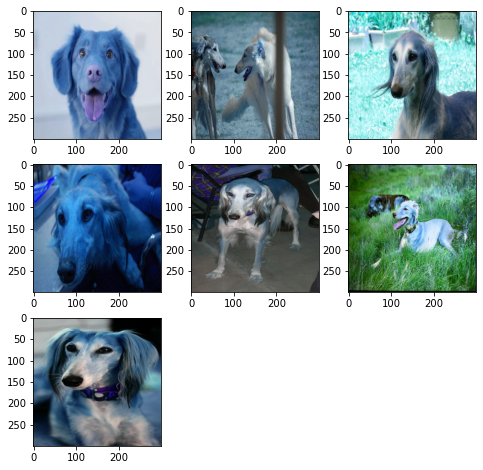

In [27]:
print("Original images")
fig = plt.figure(figsize=(8, 8))
for i in range(1,8):
    fig.add_subplot(3,3,i)
    plt.imshow(x[9+i])
plt.show()

In [15]:
x_resampled, y_resampled = SMOTE(random_state=1).fit_resample(x.reshape(x.shape[0], -1), y)

x_train = x_resampled.reshape(x_resampled.shape[0], 300, 300, 3)
y_train = pd.get_dummies(y_resampled).values
print(np.argmax(y_train, axis=1))

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


SMOTE generation included images


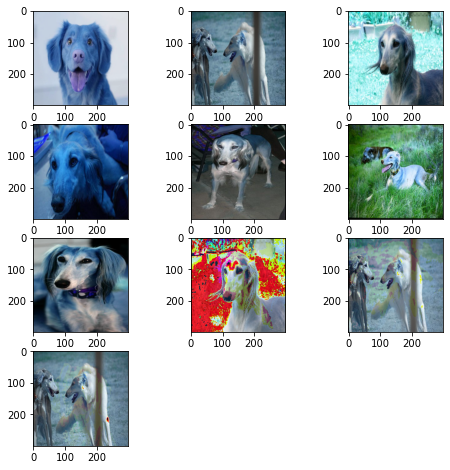

In [25]:
print("SMOTE generation included images")
#plt.imshow(x_train[19])
p#lt.show()

fig = plt.figure(figsize=(8, 8))
for i in range(1,11):
    fig.add_subplot(4,3,i)
    plt.imshow(x_train[9+i])
plt.show()

### Conclusion: SMOTE does not outperform image augmentation and shouldn't be  